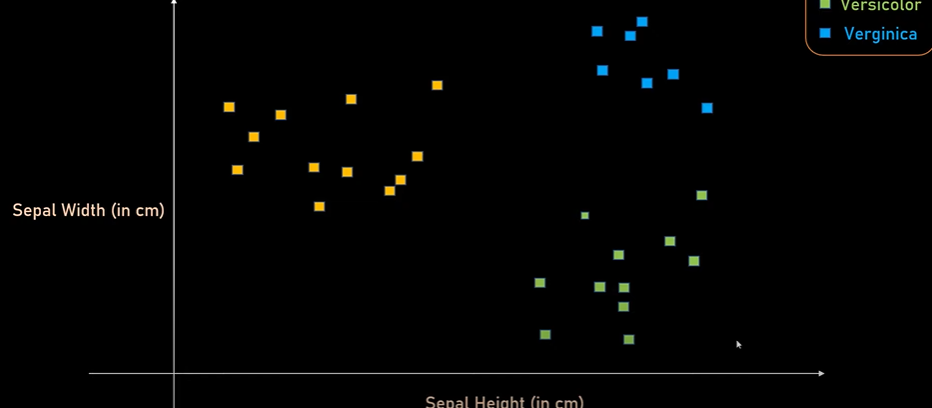

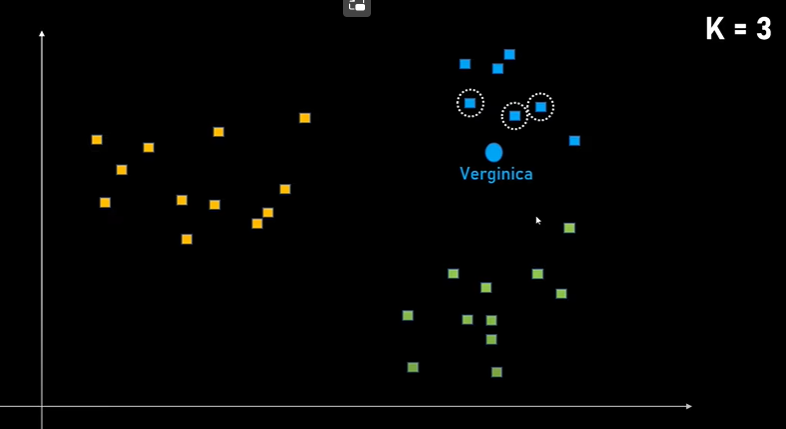

calculate distace from 3 nearest data point then find maximum no of data are belongs which class

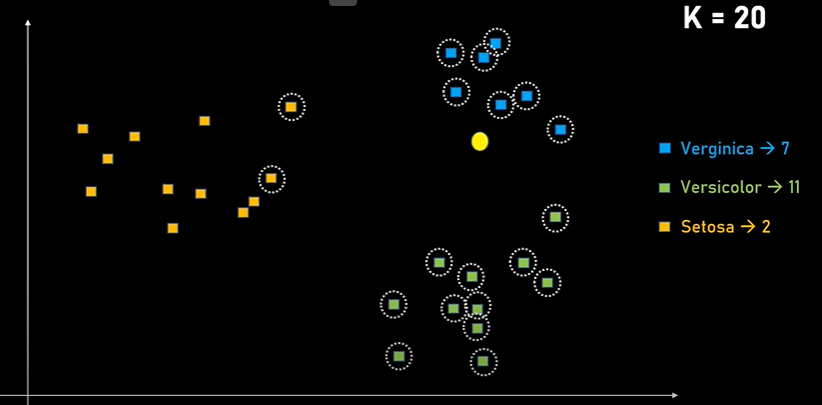

calculate distace from 20 nearest data point then find maximum no of data are belongs which class

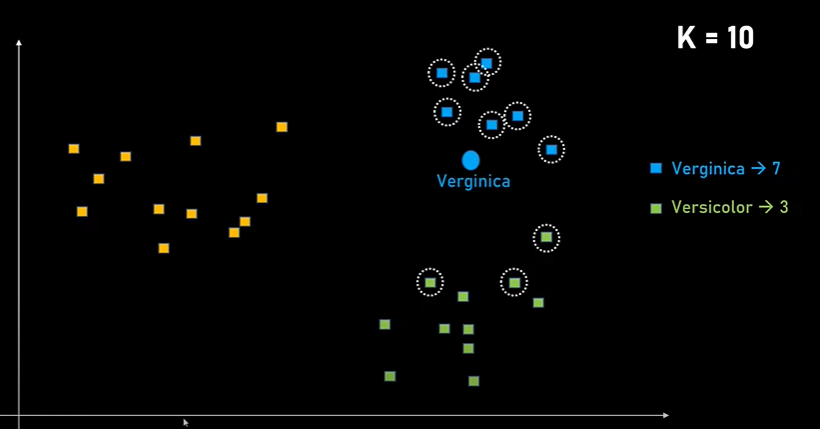

calculate distace from 10 nearest data point then find maximum no of data are belongs which class

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['target'] =  iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [5]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

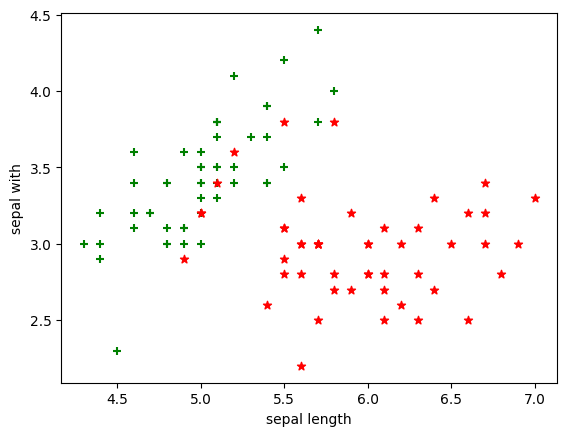

In [9]:
plt.xlabel('sepal length')
plt.ylabel('sepal with')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df2['sepal width (cm)'],color='red',marker='*')


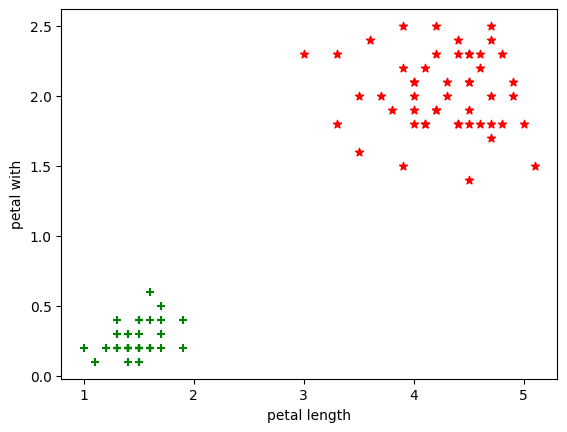

In [10]:
plt.xlabel('petal length')
plt.ylabel('petal with')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df2['petal width (cm)'],color='red',marker='*')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = df.drop(['target'],axis=1)

In [13]:
y= df['target']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(x_train,y_train)

In [18]:
knn.score(x_test,y_test)

1.0

In [20]:
y_pred = knn.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix

In [23]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [24]:
import seaborn as sns

<Axes: >

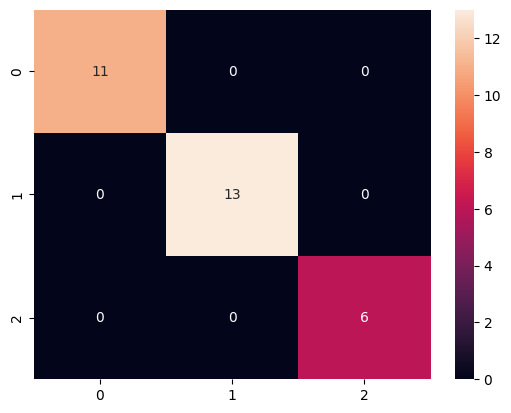

In [25]:
sns.heatmap(cm,annot=True)

However, how do we decide the value of ‘k’?

 Maybe we should use k = 1 so that we will get very good results on our 
trainingdata? That might work, but we cannot guarantee that the model will perform just
 as well on our testing data since it can get too specific

 
 How about using a high value of k, say like k = 100 so that we can consider a
 large number of nearest points to account for the distant points as well?
 However, this kind of model will be too generic and we cannot be sure if it has
 considered all the possible contributing features correctly.

In [ ]:
train_score = []
test_score = []
k_vals = []
for k in range(1, 21):
   k_vals.append(k)
   knn = KNeighborsClassifier(n_neighbors = k)
   knn.fit(x_train, y_train)
   
   tr_score = knn.score(x_train, y_train)
   train_score.append(tr_score)
   
   te_score = knn.score(x_test, y_test)
   test_score.append(te_score)

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
        bbox_transform=plt.gcf().transFigure)
plt.show()

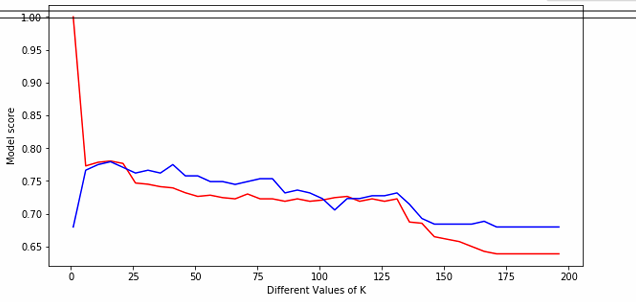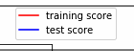

We can make the following conclusions from the above plot:

 For low values of k, the training score is high, while the testing score is low
 As the value of k increases, the testing score starts to increase and the training
 score starts to decrease.

 However, at some value of k, both the training score and the testing score are
 close to each other.
 
 This is where Bias and Variance come into the picture

next go to bias variance . ipynb

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
knn.predict()

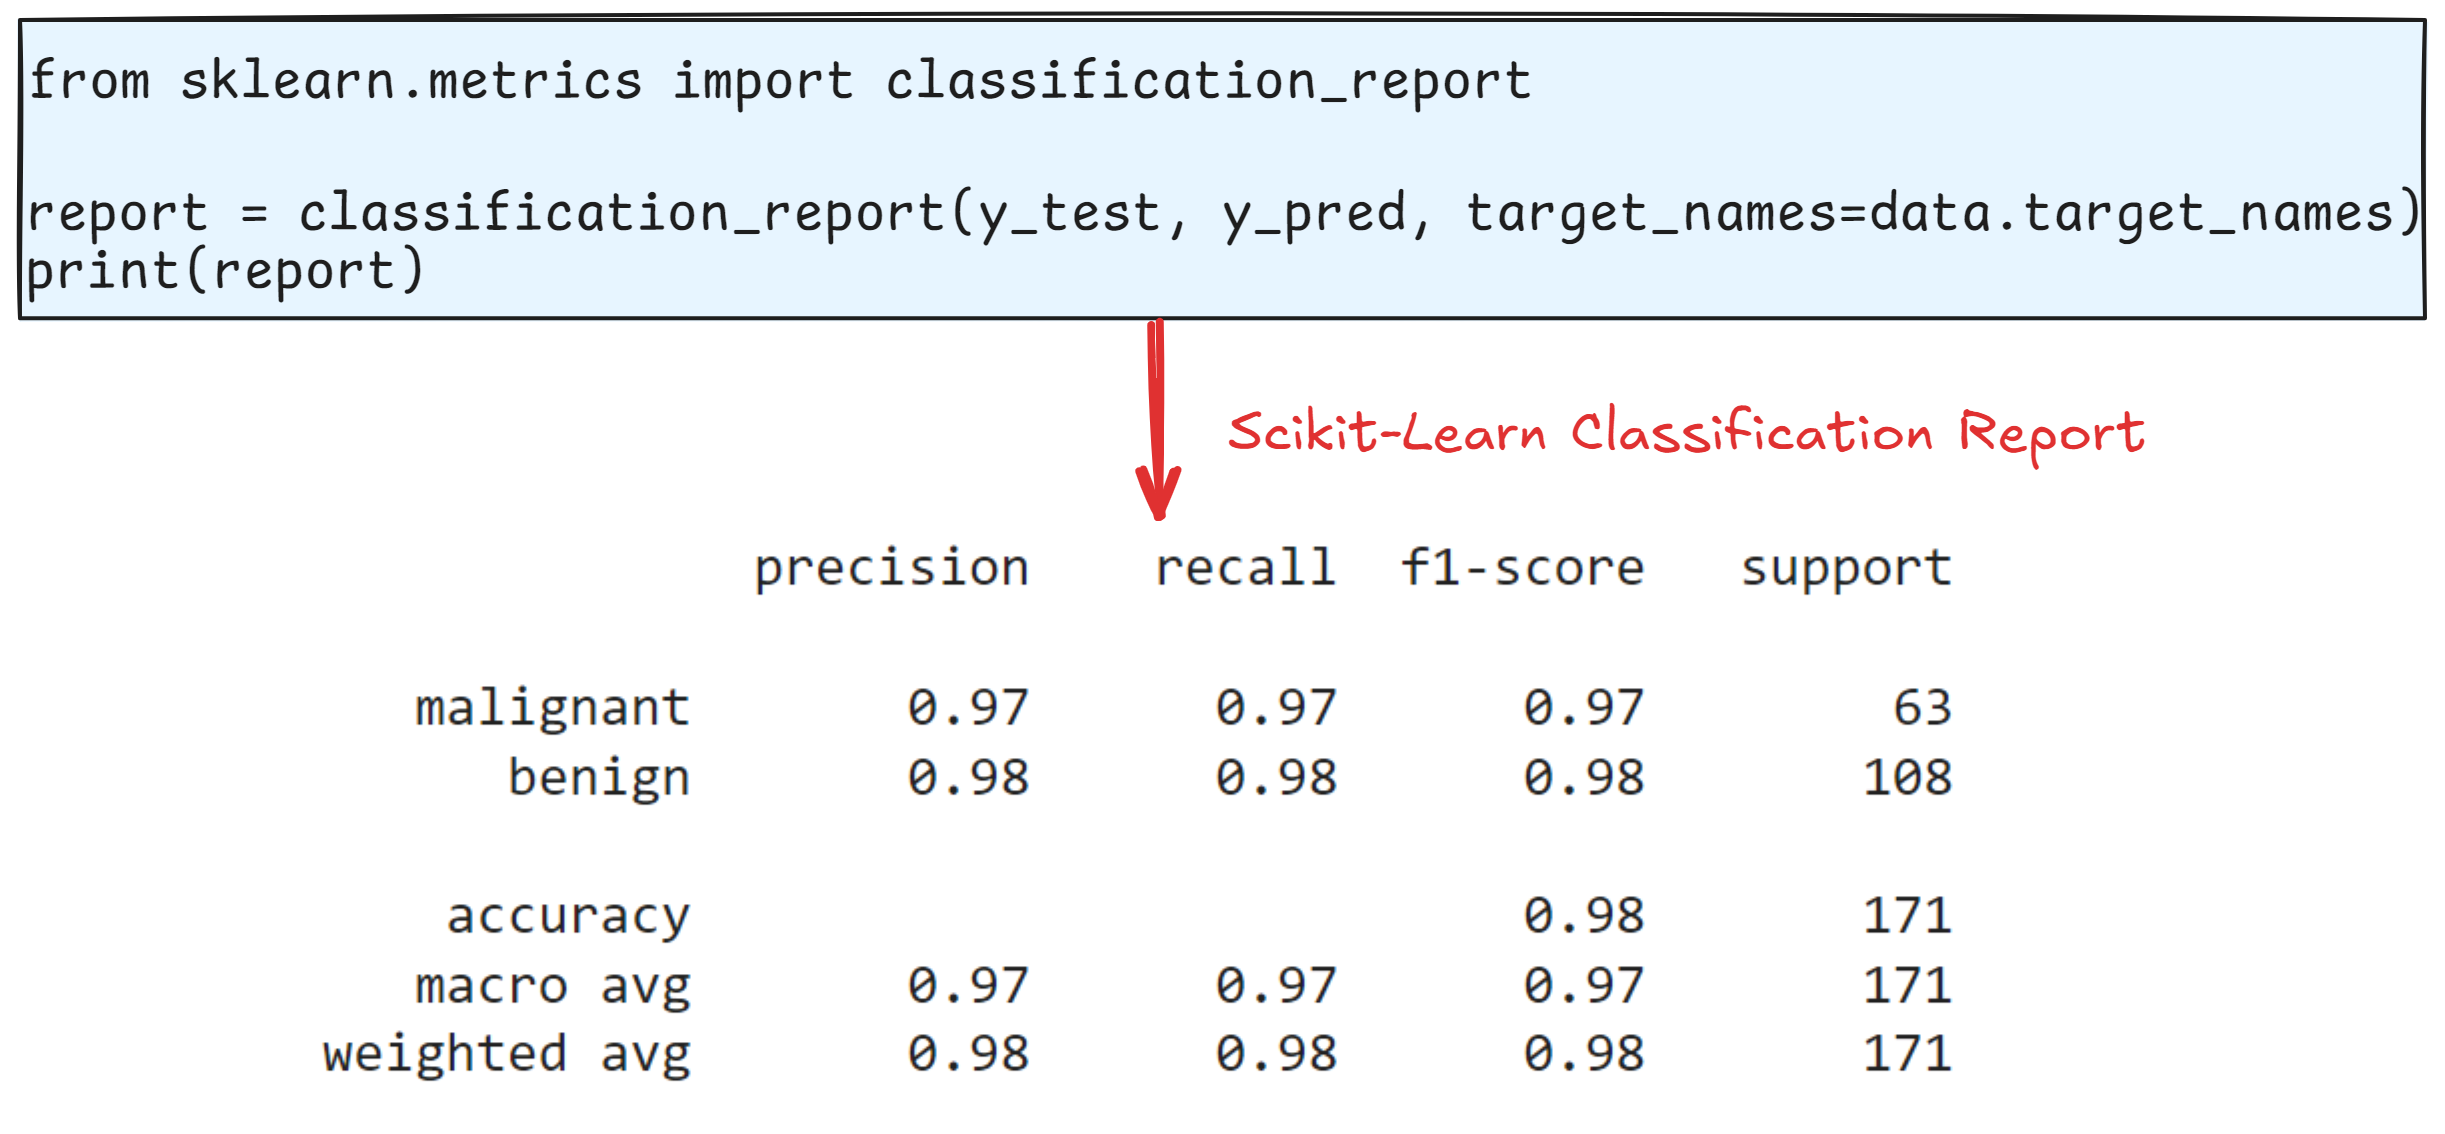

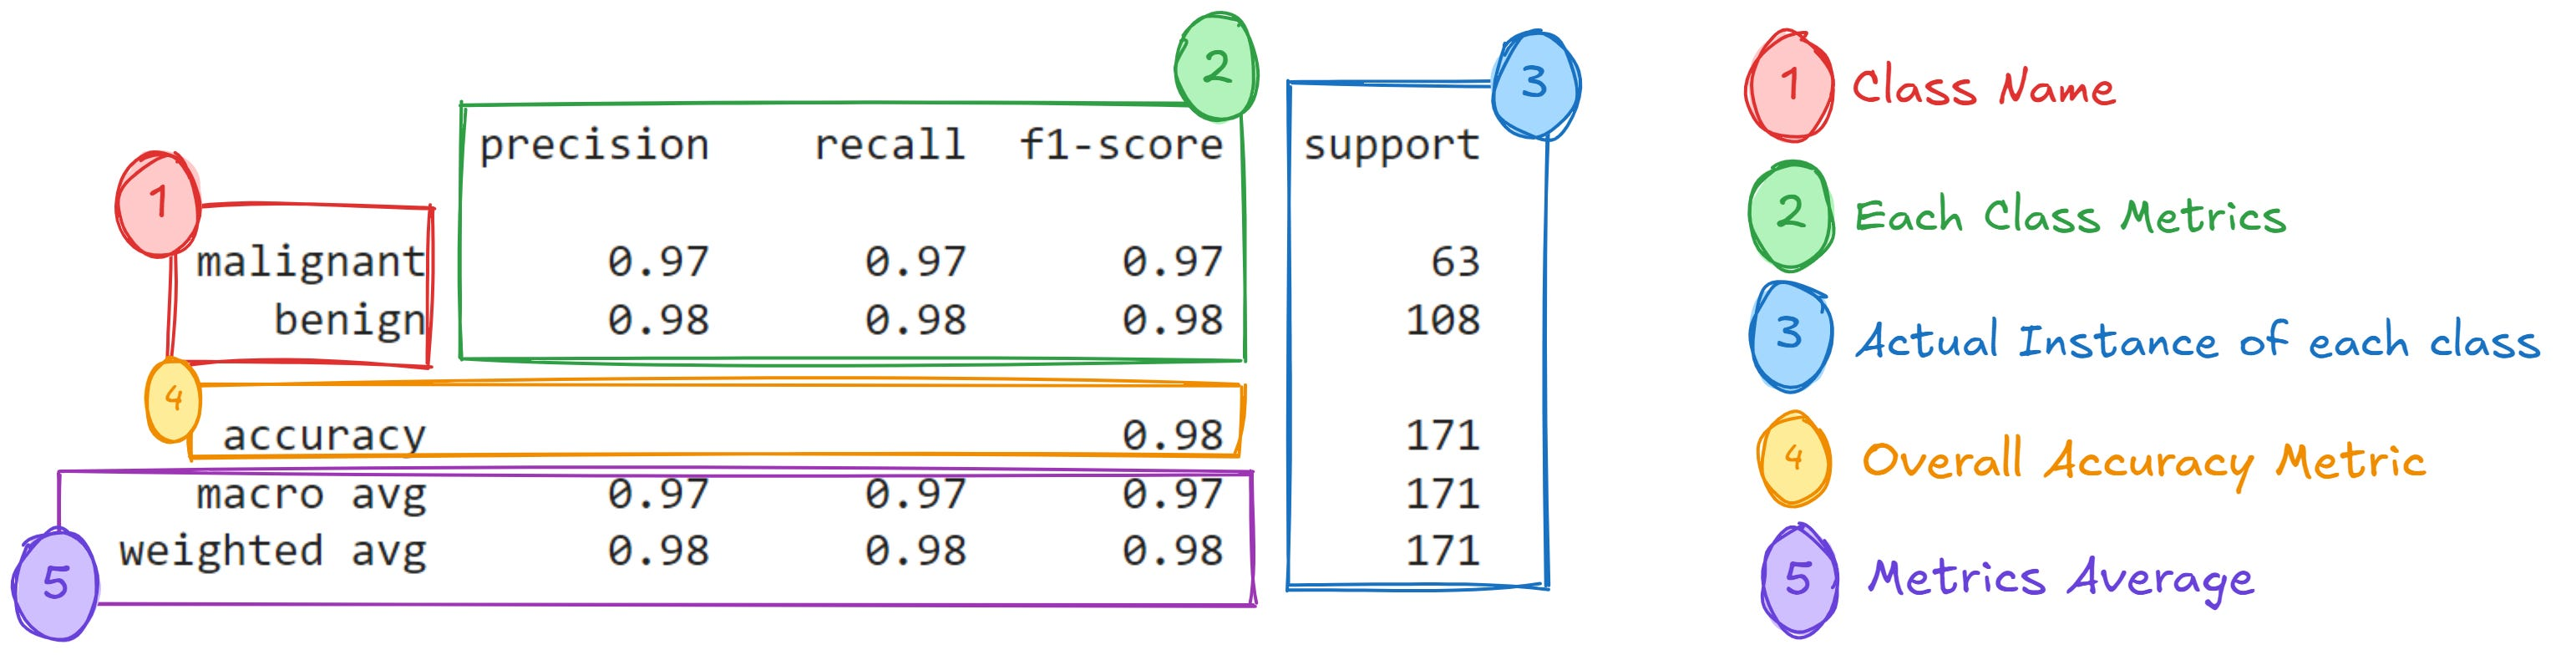

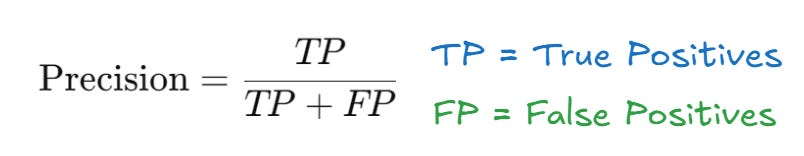

 it tries to minimize the False Positive cases that happen in the
 classifier.

positive doesn’t mean it is only specific to a certain class. The
 positive class means the current class it tries to predict.
 The precision of 0.97 for Malignant means it calculates the precision to
 predict the Malignant class—which means the positive is the Malignant cla
 It’s also true for the Beningn class

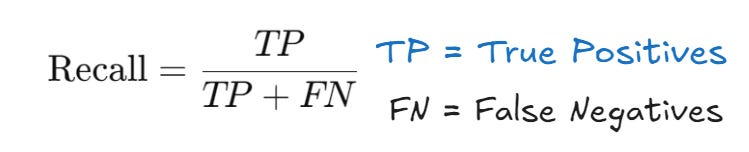

 it would try to minimize the False Negative cases that happen 
the classifier.
 Similar to precision, it’s up to your business cases to determine which case
 you want to minimize.
 However, you can use the next metric to balance the false positive and
 negative cases

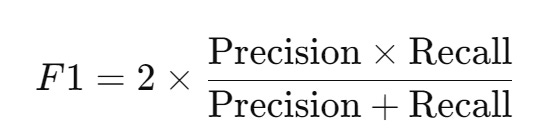

F1 Score is a harmonic means between the Precision and Recall score

The metric would give a single number that would take account of both fa
 positive and false negative cases.
 If balance is important for certain class predictions, then you should focus
 this metric

3. Actual Instances for each class (Support)

 The number of data points that belong to each class. For example, there ar
 63 Malignant and Benign.
 The support number shows how many data points are considered for
 calculating the metrics for each class.
 Higher support means more data points for that class, which could affect t
 metric reliability.

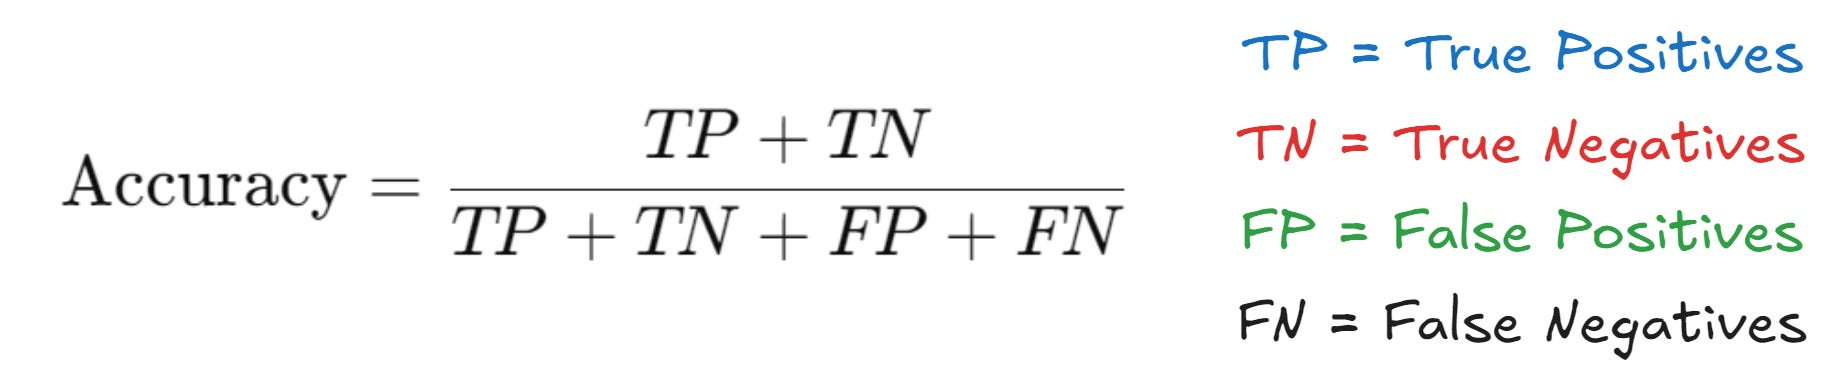

 The overall accuracy score for the classifier gives a general idea of the mo
 performance but can be misleading as it considers every correct predictio
 for both classes.

To understand the classifier's performance, we must accompany accuracy
 with the other metrics.

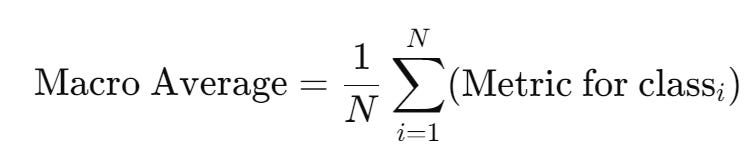

For example, the precision macro average is 0.97 because it’s calculated as
 (0.97 + 0.98)/2 = 0.975 (rounded down to 0.97)
 
 The Weighted Average is a bit more complex as it considers the support in
 calculation

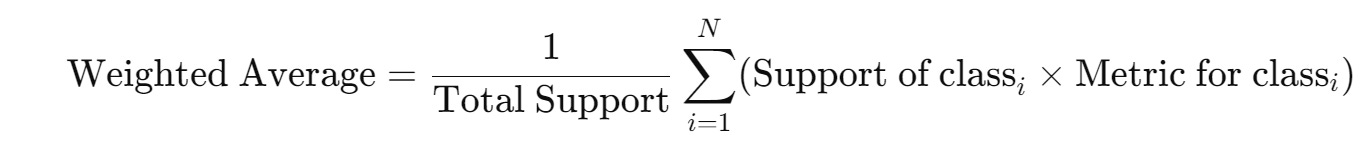

Weighted Average for precision is calculated as:
 1/171 * ((0.97 * 63) + (0.98 * 108)) = 0.976 (rounded up to 0.98)
 Weighted average usually is a better measurement when you have an
 imbalance case

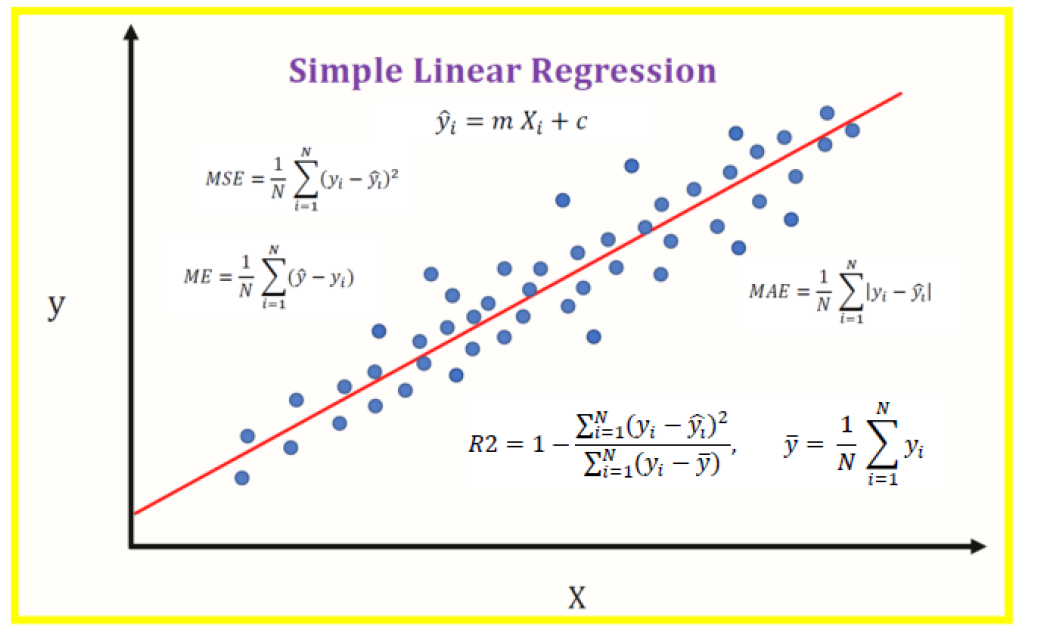